#Итоговое задание. Аналитика_данных/Data_scientist


##Кейс «Прогнозирование размеров сварного шва при электронно-лучевой сварке тонкостенных конструкций аэрокосмического назначения»

###Исполнитель: Сясина Дарья


**Исходные данные** - результаты экспериментальных исследований, проводимых в целях улучшения технологического процесса электронно-лучевой сварки изделия, сборка которого состоит из элементов, состоящих из разнородного материала. Установка электронно-лучевой сварки, на которой проводились исследования, предназначена для сварки электронным лучом в глубоком вакууме деталей сборочных единиц из нержавеющих сталей, титановых, алюминиевых и специальных сплавов. Существующая установка электронно-лучевой сварки обеспечивает повторяемость режимов в рамках возможностей реализованной системы управления. Работы по сварке выполнялись на образцах-имитаторах, соответствующих технологическому изделию.

Для уменьшения вложения энергии при сварке:
1.	Снижалась **величина сварочного тока (IW)**;
2.	Увеличивался **ток фокусировки электронного пучка (IF)**;
3.	Увеличивалась **скорость сварки (VW)**;
4.	Менялось **расстояние от поверхности образцов до электронно-оптической системы (FP)**.

По совокупности параметров технологических режимов обеспечивались минимально возможные размеры сварных швов: **глубина шва (Depth)** и ширина шва (Width).

В процессе выполнения работ была произведена электронно-лучевая сварка 18-ти единиц образцов. Результаты металлографического контроля по размерам сварного шва для каждого образца проводились в 4-х поперечных сечениях сварного шва. Ускоряющее напряжение было постоянным в диапазоне 19,8 – 20 кВ. Набор полученных данных собраны в составе режимов сварки, размеров сварочных швов в поперечных сечениях всех образцов.


**Цель проекта:**
- провести прогнозирование глубины (Depth) и ширины (Width) сварного шва в зависимости от параметров технологического процесса (IW, IF, VW, FP).

**Задачи проекта:**

- изучить данные, провести их предварительную обработку
- провести исследовательский анализ данных (EDA)
- применить не менее 3-х алгоритмов машинного обучения (включая  использование искусственных нейронных сетей), позволяющих решить поставленную задачу анализа данных, выбрать лучшую модель и применить ее в приложении
- создать локальный репозиторий git
- реализовать приложение (консольное, оконное или веб-приложение)
- выгрузить коммиты приложения из локального репозитория на github.com

##**1. Изучение и предварительная обработка данных**

In [63]:
# Импортируем нужные библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from sklearn.linear_model import LinearRegression, RidgeCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor 

import tensorflow as tf
from tensorflow import keras
from keras import utils
from keras import layers
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import Adam
print(tf.__version__)
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
import pickle

2.9.2


In [2]:
!pip install scikit-learn==0.22.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 7.0 MB 8.9 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.5 requires scikit-learn>=1.0.0, but you have scikit-learn 0.22.1 which is incompatible.
imbalanced-learn 0.8.1 requires scikit-learn>=0.24, but you have scikit-learn 0.22.1 which is incompatible.


In [3]:
import pickle
!pip install sklearn_porter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 144 kB 31.2 MB/s 


In [4]:
df = pd.read_csv('/content/ebw_data.csv')

Рассмотрим и изучим имеющиеся данные:
- величина сварочного тока (IW)
- ток фокусировки электронного пучка (IF)
- скорость сварки (VW)
- расстояние от поверхности образцов до электронно-оптической системы (FP)
- глубина шва (Depth)
- ширина шва (Width)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   IW      72 non-null     int64  
 1   IF      72 non-null     int64  
 2   VW      72 non-null     float64
 3   FP      72 non-null     int64  
 4   Depth   72 non-null     float64
 5   Width   72 non-null     float64
dtypes: float64(3), int64(3)
memory usage: 3.5 KB


In [6]:
df.head()

,IW,IF,VW,FP,Depth,Width
0,47,139,4.5,80,1.60,2.54
1,47,139,4.5,80,1.62,2.50
2,47,139,4.5,80,1.68,2.60
3,47,139,4.5,80,1.58,2.52
4,45,140,4.5,80,1.76,2.48


In [7]:
df.isna().sum()

IW       0
IF       0
VW       0
FP       0
Depth    0
Width    0
dtype: int64

Данные чистые, в них нет пропусков, все данные числовых типов, всего значений 72 - по 4 сечения для каждого из 18 образцов, все верно.

Рассмотрим статистику по данным и построим гистрограммы и "ящики с усами" для всех параметров.

In [8]:
df.nunique()

IW        7
IF        8
VW        5
FP        5
Depth    29
Width    25
dtype: int64

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
IW,72.0,45.666667,1.678363,43.00,44.00,45.50,47.00,49.00
IF,72.0,141.333333,5.145763,131.00,139.00,141.00,146.00,150.00
VW,72.0,8.638889,2.061078,4.50,8.00,9.00,10.00,12.00
FP,72.0,78.333333,21.493530,50.00,60.00,80.00,80.00,125.00
Depth,72.0,1.195556,0.225081,0.80,1.08,1.20,1.29,1.76
Width,72.0,1.970417,0.279040,1.68,1.76,1.84,2.05,2.60


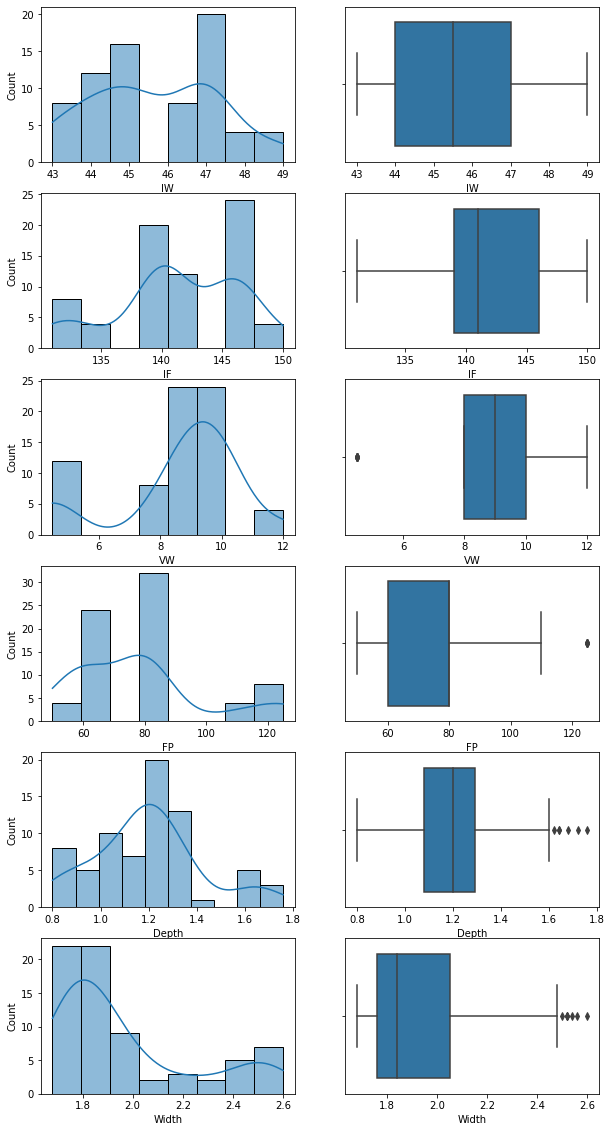

In [10]:
fig, axes = plt.subplots(6, 2, figsize=(10, 20))
for k, column in enumerate(df.columns):    
    sns.histplot(data=df, x=column, kde=True, ax=axes[k, 0])
    sns.boxplot(data=df, x=column, ax=axes[k, 1])
plt.show()

Значения распределены ближе к нормальному, за исключением ширины шва. Также в данных по ширине и глубине шва есть очень высокие значения, которые можно было бы счесть выбросами, если бы не ограниченный объем выборки. У нас есть всего 72 значения, так что удалять какие-то из них мы не станем.

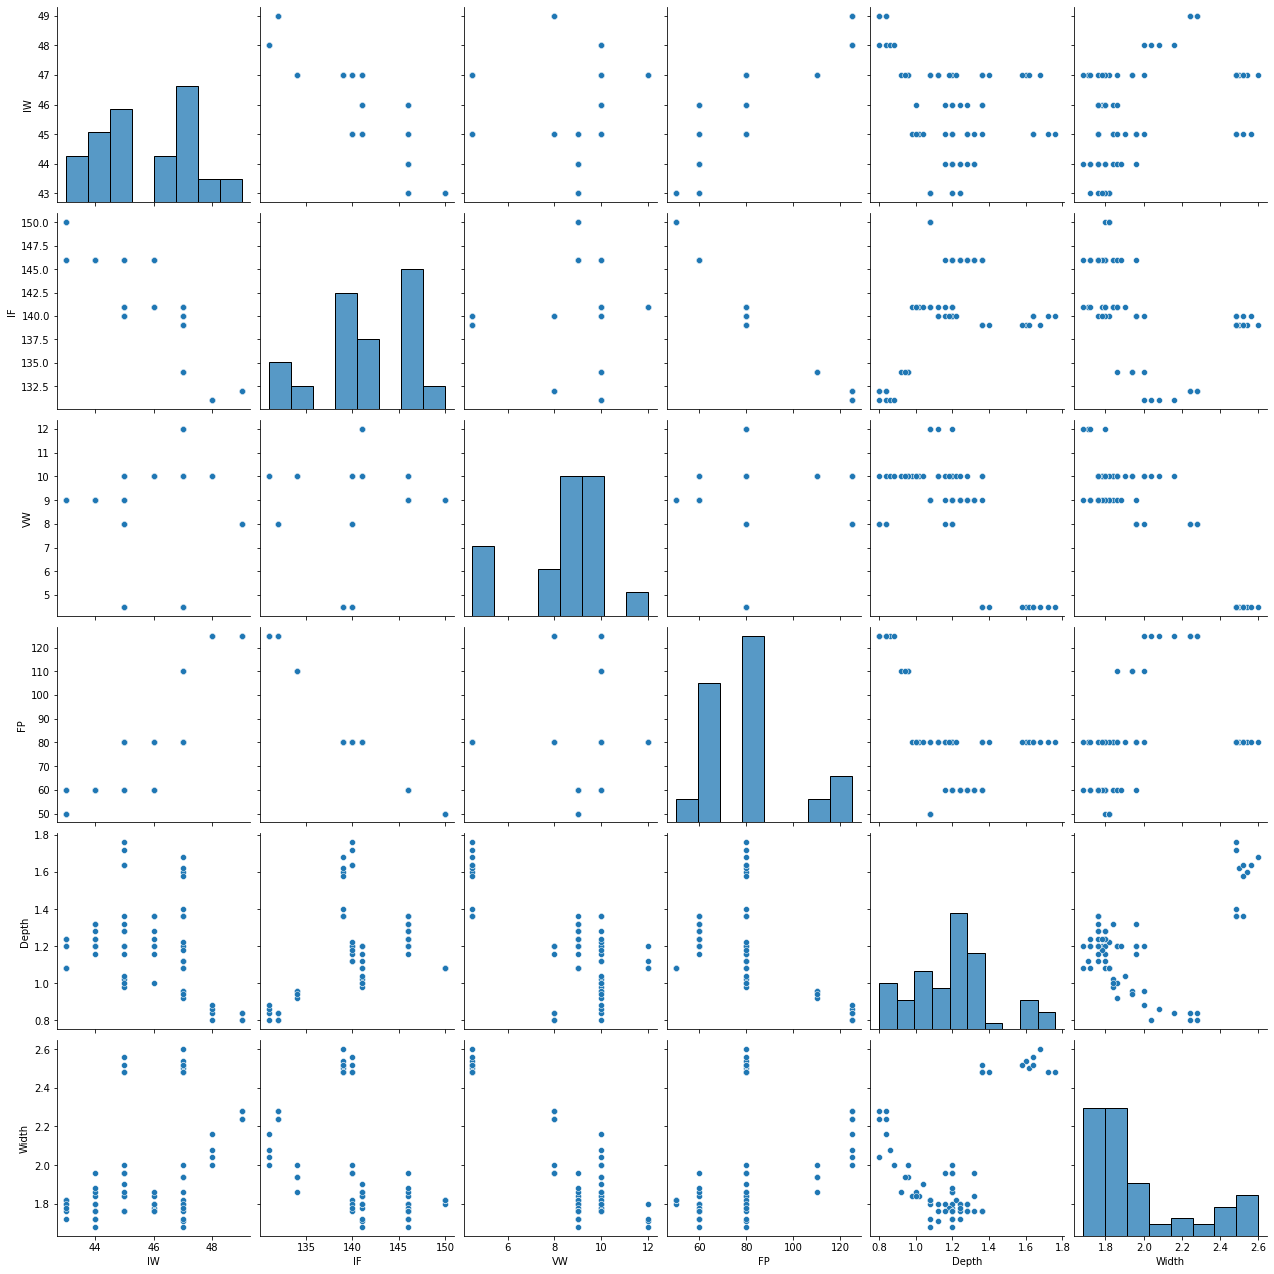

In [11]:
sns.pairplot(df, height=3)

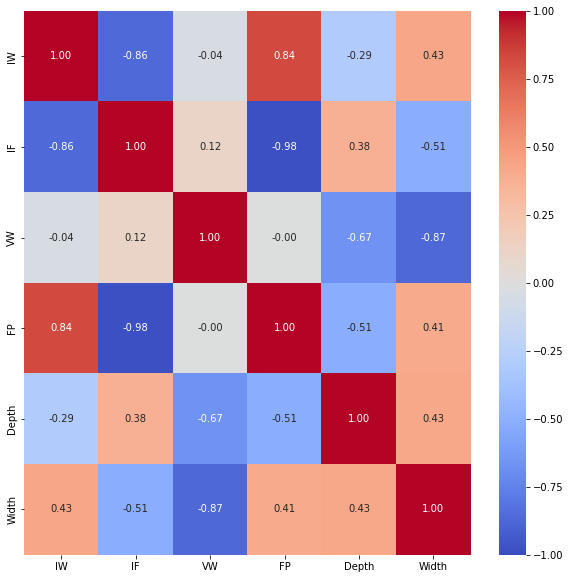

In [12]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr, vmin=-1, vmax=1, annot=True, fmt='.2f', cmap='coolwarm', ax=ax)
plt.show()

Из таблицы корреляций не видно явной связи глубины и ширины шва с другими параметрами. 

##**2. Создание модели**

Целевые и нецелевые переменные количественные, так что логично будет применить регрессию - линейную и градиентный бустинг. Также используем некоторые другие модели и оценим качество их работы. Но для начала разделим данные - выделим целевые признаки ширину 'Width' и глубину 'Depth', а потом разобьем наши данные на обучающую и тестовую выборки.

###Предобработка

Разделение данных

In [13]:
X = df.drop(columns = ['Width', 'Depth']).copy()

In [14]:
y_depth = df['Depth']
y_width = df['Width']

In [15]:
y_depth = np.array(y_depth).reshape((-1, ))
y_width = np.array(y_width).reshape((-1, ))


In [16]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y_depth, test_size=0.2, random_state=0)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y_width, test_size=0.2, random_state=0)

Таким образом, у нас получилось 2 набора данных для работы с моделями - один с целевой переменной глубины, второй - с целевой переменной ширины шва. 

In [17]:
X_train1.describe().T

,count,mean,std,min,25%,50%,75%,max
IW,57.0,45.561404,1.711490,43.0,44.0,45.0,47.0,49.0
IF,57.0,141.719298,5.038262,131.0,140.0,141.0,146.0,150.0
VW,57.0,8.719298,1.943436,4.5,8.0,9.0,10.0,12.0
FP,57.0,77.017544,20.977446,50.0,60.0,80.0,80.0,125.0


###Масштабирование

Разброс данных очень большой, поэтому для дальнейшей работы лучше их масштабировать. Будем использовать StandardScaler, и сначала обучим его на учебной выборке, а потому уже применим модель к тестовой, чтобы не вмешиваться в тестовые данные.

####Глубина

In [18]:
scaler_1 = StandardScaler() # создаём объект класса scaler
X_train1_sc = pd.DataFrame(
    scaler_1.fit_transform(X_train1),
    columns = X_train1.columns
)

In [19]:
X_test1_sc = pd.DataFrame(
    scaler_1.transform(X_test1),
    columns = X_test1.columns
)

In [20]:
y_train1 = np.array(y_train1).reshape((-1, ))
y_test1 = np.array(y_test1).reshape((-1, ))


####Ширина

In [21]:
scaler_2 = StandardScaler() # создаём объект класса scaler

X_train2_sc = pd.DataFrame(
    scaler_2.fit_transform(X_train2),
    columns = X_train2.columns
)

In [22]:
X_test2_sc = pd.DataFrame(
    scaler_2.transform(X_test2),
    columns = X_test2.columns
)

In [23]:
y_train2 = np.array(y_train2).reshape((-1, ))
y_test2 = np.array(y_test2).reshape((-1, ))

In [24]:
X_train2_sc.describe().T

,count,mean,std,min,25%,50%,75%,max
IW,57.0,-1.048869e-15,1.008889,-1.509896,-0.920416,-0.330936,0.848024,2.026984
IF,57.0,1.612745e-15,1.008889,-2.146491,-0.344282,-0.144036,0.857191,1.658173
VW,57.0,4.401937e-16,1.008889,-2.190350,-0.373407,0.145720,0.664846,1.703099
FP,57.0,-7.791039e-18,1.008889,-1.299381,-0.818442,0.143438,0.143438,2.307668


Теперь все данные масштабированы, можно выбрать функцию для оценки точности работы модели. Возьмем для этого среднюю квадратичную ошибку и среднюю абсолютную ошибку.

Затем создадим функцию для обучения модели на данных для обучения и затем проверки и оценки прогноза на данных для теста. 

In [25]:
def mse(y_true, y_pred):
    return mean_squared_error(y_true,y_pred)

In [26]:
def mae(y_true, y_pred):
    return mean_absolute_error(y_true,y_pred)

In [27]:
#Отдельная функция для целевой переменной "глубина"
def fit_and_evaluate1(model):
    
    # Train the model
    model.fit(X_train1_sc, y_train1)
    
    # Make predictions and evalute
    model_pred = model.predict(X_test1_sc)
    model_mae = mae(y_test1, model_pred)
    model_mse = mse(y_test1, model_pred)
    
    # Return the performance metric
    return model_mae, model_mse, print("{} MAE для глубины: {}".format(model, model_mae)), print("{} MSE для глубины: {}".format(model, model_mse))

In [28]:
#Отдельная функция для целевой переменной "ширина"
def fit_and_evaluate2(model):
    
    # Train the model
    model.fit(X_train2_sc, y_train2)
    
    # Make predictions and evalute
    model_pred = model.predict(X_test2_sc)
    model_mae = mae(y_test2, model_pred)
    model_mse = mse(y_test2, model_pred)

    # Return the performance metric
    return model_mae, model_mse, print("{} MAE для ширины: {}".format(model, model_mae)), print("{} MSE для ширины: {}".format(model, model_mse))

###Модели

Для сравнения возьмем алгоритмы линейной регрессии, метода опорных векторов, метода случайного леса, градиентного бустинга, метода ближайших соседей, гребневой регрессии, а также класс MLPRegressor с многослойным перцептроном (MLP) из библиотеки scikit-learn. Затем попробуем построить нейронную сеть.

####Линейная регрессия

In [29]:
#для целевой переменной "глубина"
lr1 = LinearRegression()
lr_evaluation1 = fit_and_evaluate1(lr1)

LinearRegression() MAE для глубины: 0.11436008995520407
LinearRegression() MSE для глубины: 0.020908925212918043


In [30]:
#для целевой переменной "ширина"
lr2 = LinearRegression()
lr_evaluation2 = fit_and_evaluate2(lr2)

LinearRegression() MAE для ширины: 0.06422480515166676
LinearRegression() MSE для ширины: 0.006596885753996514


####Метод опорных векторов

In [31]:
#для целевой переменной "глубина"
svm1 = SVR()
svm_evaluation1 = fit_and_evaluate1(svm1)

SVR() MAE для глубины: 0.06048830184836954
SVR() MSE для глубины: 0.006202936799197228


In [32]:
#для целевой переменной "ширина"
svm2 = SVR()
svm_evaluation2 = fit_and_evaluate2(svm2)

SVR() MAE для ширины: 0.06547768970203076
SVR() MSE для ширины: 0.007739431383130551


####Метод случайного леса


In [33]:
#для целевой переменной "глубина"
random_forest1 = RandomForestRegressor(random_state=60)
random_forest_evaluation1 = fit_and_evaluate1(random_forest1)

RandomForestRegressor(random_state=60) MAE для глубины: 0.08008003396603405
RandomForestRegressor(random_state=60) MSE для глубины: 0.010700300698824787


In [34]:
#для целевой переменной "ширина"
random_forest2 = RandomForestRegressor(random_state=60)
random_forest_evaluation2 = fit_and_evaluate2(random_forest2)

RandomForestRegressor(random_state=60) MAE для ширины: 0.0518606995966993
RandomForestRegressor(random_state=60) MSE для ширины: 0.0050158168262485975


####Градиентный бустинг

In [35]:
gradient_boosting1 = GradientBoostingRegressor(random_state=60)
gradient_boosting_evaluation1 = fit_and_evaluate1(gradient_boosting1)

GradientBoostingRegressor(random_state=60) MAE для глубины: 0.07892963993241724
GradientBoostingRegressor(random_state=60) MSE для глубины: 0.010331842620568635


In [36]:
#для целевой переменной "ширина"
gradient_boosting2 = GradientBoostingRegressor(random_state=60)
gradient_boosting_evaluation2 = fit_and_evaluate2(gradient_boosting2)

GradientBoostingRegressor(random_state=60) MAE для ширины: 0.05200017940843359
GradientBoostingRegressor(random_state=60) MSE для ширины: 0.004989901591444639


####Метод ближайших соседей

In [37]:
#для целевой переменной "глубина"
knn1 = KNeighborsRegressor(n_neighbors=10)
knn_evaluation1 = fit_and_evaluate1(knn1)

KNeighborsRegressor(n_neighbors=10) MAE для глубины: 0.07013333333333334
KNeighborsRegressor(n_neighbors=10) MSE для глубины: 0.007547733333333332


In [38]:
#для целевой переменной "ширина"
knn2 = KNeighborsRegressor(n_neighbors=10)
knn_evaluation2 = fit_and_evaluate2(knn2)

KNeighborsRegressor(n_neighbors=10) MAE для ширины: 0.07626666666666664
KNeighborsRegressor(n_neighbors=10) MSE для ширины: 0.010046266666666658


####Гребневая регрессия

In [39]:
#для целевой переменной "глубина"
ridge1 = RidgeCV(scoring='neg_mean_absolute_error')
ridge_evaluation1 = fit_and_evaluate1(ridge1)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), scoring='neg_mean_absolute_error') MAE для глубины: 0.11256066845557715
RidgeCV(alphas=array([ 0.1,  1. , 10. ]), scoring='neg_mean_absolute_error') MSE для глубины: 0.020073566321178665


In [40]:
#для целевой переменной "ширина"
ridge2 = RidgeCV(scoring='neg_mean_absolute_error')
ridge_evaluation2 = fit_and_evaluate2(ridge2)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), scoring='neg_mean_absolute_error') MAE для ширины: 0.06505723817863664
RidgeCV(alphas=array([ 0.1,  1. , 10. ]), scoring='neg_mean_absolute_error') MSE для ширины: 0.006635477971727334


####MLPRegressor

In [41]:
#для целевой переменной "глубина"
mlp1 = MLPRegressor(solver = 'sgd', 
                           random_state = 15,
                           max_iter = 500, 
                           batch_size = 10)
mlp_ev1 = fit_and_evaluate1(mlp1)

MLPRegressor(batch_size=10, max_iter=500, random_state=15, solver='sgd') MAE для глубины: 0.07459027170572043
MLPRegressor(batch_size=10, max_iter=500, random_state=15, solver='sgd') MSE для глубины: 0.008216993576355523


In [42]:
#для целевой переменной "ширина"
mlp2 = MLPRegressor(solver = 'sgd', 
                           random_state = 15,
                           max_iter = 500, 
                           batch_size = 10)
mlp_ev2 = fit_and_evaluate1(mlp2)

MLPRegressor(batch_size=10, max_iter=500, random_state=15, solver='sgd') MAE для глубины: 0.07459027170572043
MLPRegressor(batch_size=10, max_iter=500, random_state=15, solver='sgd') MSE для глубины: 0.008216993576355523


###Искусственная нейронная сеть

В данном датасете не так много данных, поэтому использование нейронных сетей может быть излишним, но раз того требует задание, попробуем и этот метод.

Epoch 1/100
2/2 - 2s - loss: 1.3272 - mse: 1.3272 - mae: 1.1257 - val_loss: 1.2807 - val_mse: 1.2807 - val_mae: 1.1094 - 2s/epoch - 821ms/step
Epoch 2/100
2/2 - 0s - loss: 1.1966 - mse: 1.1966 - mae: 1.0563 - val_loss: 1.1859 - val_mse: 1.1859 - val_mae: 1.0584 - 23ms/epoch - 12ms/step
Epoch 3/100
2/2 - 0s - loss: 1.0941 - mse: 1.0941 - mae: 0.9888 - val_loss: 1.1083 - val_mse: 1.1083 - val_mae: 1.0088 - 22ms/epoch - 11ms/step
Epoch 4/100
2/2 - 0s - loss: 1.0113 - mse: 1.0113 - mae: 0.9226 - val_loss: 1.0473 - val_mse: 1.0473 - val_mae: 0.9617 - 42ms/epoch - 21ms/step
Epoch 5/100
2/2 - 0s - loss: 0.9507 - mse: 0.9507 - mae: 0.8782 - val_loss: 1.0015 - val_mse: 1.0015 - val_mae: 0.9174 - 24ms/epoch - 12ms/step
Epoch 6/100
2/2 - 0s - loss: 0.9094 - mse: 0.9094 - mae: 0.8468 - val_loss: 0.9690 - val_mse: 0.9690 - val_mae: 0.8775 - 26ms/epoch - 13ms/step
Epoch 7/100
2/2 - 0s - loss: 0.8921 - mse: 0.8921 - mae: 0.8249 - val_loss: 0.9468 - val_mse: 0.9468 - val_mae: 0.8422 - 26ms/epoch - 13m

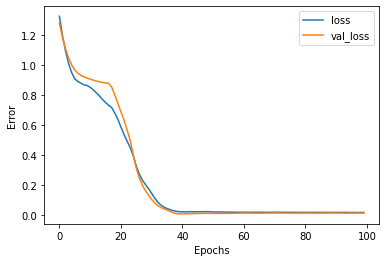

In [43]:
#для целевой переменной "глубина"
model1 = Sequential()
model1.add(Dense(X_train1_sc.shape[1], input_dim = X_train1_sc.shape[1], activation='linear'))
model1.add(Dense(100))
model1.add(Dense(1, activation='relu'))
model1.compile(loss='mse', optimizer="adam", metrics=['mse', 'mae'])
history = model1.fit(X_train1_sc, y_train1,
                    epochs=100,
                    verbose=2,
                    validation_data=(X_test1_sc, y_test1))

plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.legend()
plt.show()

In [44]:
print(model1.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 20        
                                                                 
 dense_1 (Dense)             (None, 100)               500       
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 621
Trainable params: 621
Non-trainable params: 0
_________________________________________________________________
None


In [45]:
model1.evaluate(X_test1_sc, y_test1)

1/1 [==============================] - 0s 18ms/step - loss: 0.0147 - mse: 0.0147 - mae: 0.0990


[0.014652317389845848, 0.014652317389845848, 0.09902477264404297]

In [46]:
y_pred1 = model1.predict(X_test1_sc)

1/1 [==============================] - 0s 80ms/step


In [47]:
keras_mae1 = mae(y_test1, y_pred1)
keras_mse1 = mse(y_test1, y_pred1)

print(keras_mae1)
print(keras_mse1)

0.09902476612726847
0.014652316775126498


Показатели средние, возможно, из-за небольшого количества данных.

Epoch 1/100
2/2 - 1s - loss: 3.3889 - mse: 3.3889 - mae: 1.8006 - val_loss: 3.5713 - val_mse: 3.5713 - val_mae: 1.8510 - 625ms/epoch - 313ms/step
Epoch 2/100
2/2 - 0s - loss: 3.1289 - mse: 3.1289 - mae: 1.7189 - val_loss: 3.2679 - val_mse: 3.2679 - val_mae: 1.7651 - 28ms/epoch - 14ms/step
Epoch 3/100
2/2 - 0s - loss: 2.8955 - mse: 2.8955 - mae: 1.6422 - val_loss: 2.9894 - val_mse: 2.9894 - val_mae: 1.6792 - 23ms/epoch - 11ms/step
Epoch 4/100
2/2 - 0s - loss: 2.6692 - mse: 2.6692 - mae: 1.5567 - val_loss: 2.7387 - val_mse: 2.7387 - val_mae: 1.5943 - 23ms/epoch - 12ms/step
Epoch 5/100
2/2 - 0s - loss: 2.4858 - mse: 2.4858 - mae: 1.4767 - val_loss: 2.5130 - val_mse: 2.5130 - val_mae: 1.5102 - 24ms/epoch - 12ms/step
Epoch 6/100
2/2 - 0s - loss: 2.3111 - mse: 2.3111 - mae: 1.3926 - val_loss: 2.3152 - val_mse: 2.3152 - val_mae: 1.4281 - 29ms/epoch - 14ms/step
Epoch 7/100
2/2 - 0s - loss: 2.1812 - mse: 2.1812 - mae: 1.3244 - val_loss: 2.1420 - val_mse: 2.1420 - val_mae: 1.3473 - 21ms/epoch - 

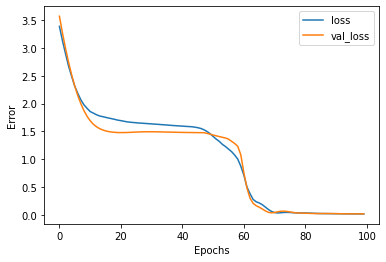

In [48]:
#для целевой переменной "ширина"
model2 = Sequential()
model2.add(Dense(X_train2_sc.shape[1], input_dim = X_train2_sc.shape[1], activation='linear'))
model2.add(Dense(100))
model2.add(Dense(1, activation='relu'))
model2.compile(loss='mse', optimizer="adam", metrics=['mse', 'mae'])
history = model2.fit(X_train2_sc, y_train2,
                    epochs=100,
                    verbose=2,
                    validation_data=(X_test2_sc, y_test2))

plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.legend()
plt.show()

In [49]:
print(model2.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 4)                 20        
                                                                 
 dense_4 (Dense)             (None, 100)               500       
                                                                 
 dense_5 (Dense)             (None, 1)                 101       
                                                                 
Total params: 621
Trainable params: 621
Non-trainable params: 0
_________________________________________________________________
None


In [50]:
model2.evaluate(X_test2_sc, y_test2)

1/1 [==============================] - 0s 23ms/step - loss: 0.0191 - mse: 0.0191 - mae: 0.1163


[0.019066374748945236, 0.019066374748945236, 0.11629287153482437]

In [51]:
y_pred2 = model2.predict(X_test2_sc)

1/1 [==============================] - 0s 46ms/step


In [52]:
keras_mae2 = mae(y_test2, y_pred2)
keras_mse2 = mse(y_test2, y_pred2)

print(keras_mae2)
print(keras_mse2)

0.11629287815093996
0.01906637614472338


##3.**Сравнение работы алгоритмов**

### Целевая переменная "глубина"

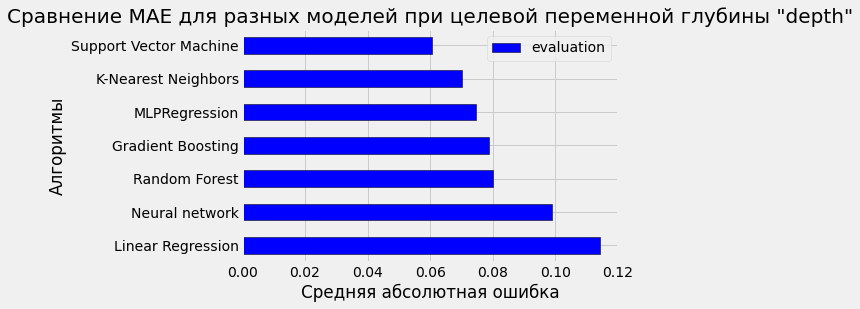

In [53]:
#для целевой переменной "глубина"
plt.style.use('fivethirtyeight')

# Dataframe to hold the results
model_comparison = pd.DataFrame({'model': ['Linear Regression', 'Support Vector Machine',
                                           'Random Forest', 'Gradient Boosting',
                                            'K-Nearest Neighbors', 'MLPRegression', 'Neural network'],
                                 'evaluation': [lr_evaluation1[0], svm_evaluation1[0], random_forest_evaluation1[0], 
                                         gradient_boosting_evaluation1[0], knn_evaluation1[0], mlp_ev1[0], keras_mae1]})

# Horizontal bar chart of test mae
model_comparison.sort_values('evaluation', ascending = False).plot(x = 'model', y = 'evaluation', kind = 'barh',
                                                           color = 'blue', edgecolor = 'black')

# Plot formatting
plt.ylabel('Алгоритмы'); plt.yticks(size = 14);plt.xlabel('Средняя абсолютная ошибка'); plt.xticks(size = 14)
plt.title('Сравнение MAE для разных моделей при целевой переменной глубины "depth"', size = 20);

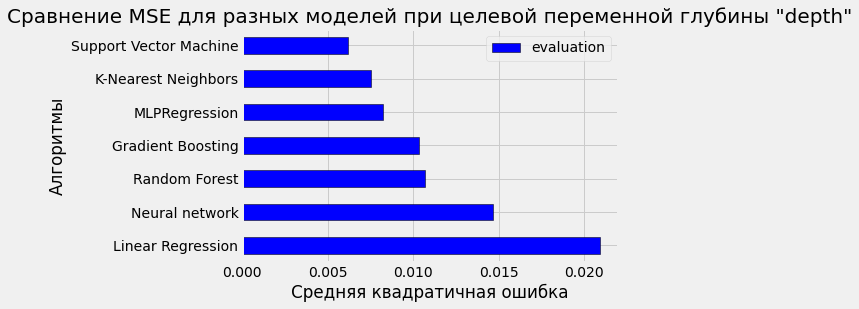

In [54]:
plt.style.use('fivethirtyeight')

# Dataframe to hold the results
model_comparison = pd.DataFrame({'model': ['Linear Regression', 'Support Vector Machine',
                                           'Random Forest', 'Gradient Boosting',
                                            'K-Nearest Neighbors', 'MLPRegression', 'Neural network'],
                                 'evaluation': [lr_evaluation1[1], svm_evaluation1[1], random_forest_evaluation1[1], 
                                         gradient_boosting_evaluation1[1], knn_evaluation1[1], mlp_ev2[1], keras_mse1]})

# Horizontal bar chart of test mae
model_comparison.sort_values('evaluation', ascending = False).plot(x = 'model', y = 'evaluation', kind = 'barh',
                                                           color = 'blue', edgecolor = 'black')

# Plot formatting
plt.yticks(size = 14); plt.xlabel('Средняя квадратичная ошибка'); plt.ylabel('Алгоритмы'); plt.xticks(size = 14)
plt.title('Сравнение MSE для разных моделей при целевой переменной глубины "depth"', size = 20);

В случае с целевой переменной "глубина" лучшие результаты показали Метод опорных векторов и Метод k-ближайших соседей. Нейросеть идет наравне с линейной регрессией.

### Целевая переменная "ширина"

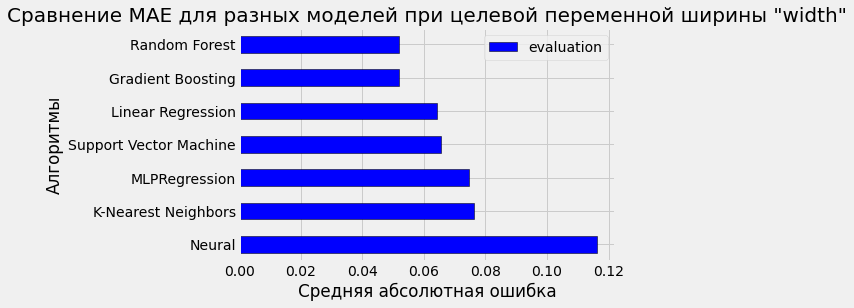

In [55]:
plt.style.use('fivethirtyeight')

# Dataframe to hold the results
model_comparison = pd.DataFrame({'model': ['Linear Regression', 'Support Vector Machine',
                                           'Random Forest', 'Gradient Boosting',
                                            'K-Nearest Neighbors', 'MLPRegression', 'Neural'],
                                 'evaluation': [lr_evaluation2[0], svm_evaluation2[0], random_forest_evaluation2[0], 
                                         gradient_boosting_evaluation2[0], knn_evaluation2[0], mlp_ev2[0], keras_mae2]})

# Horizontal bar chart of test mae
model_comparison.sort_values('evaluation', ascending = False).plot(x = 'model', y = 'evaluation', kind = 'barh',
                                                           color = 'blue', edgecolor = 'black')

# Plot formatting
plt.yticks(size = 14); plt.xlabel('Средняя абсолютная ошибка'); plt.ylabel('Алгоритмы');  plt.xticks(size = 14)
plt.title('Сравнение MAE для разных моделей при целевой переменной ширины "width"', size = 20);

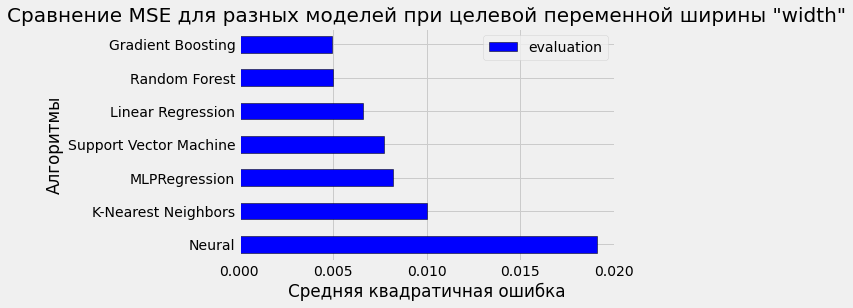

In [56]:
plt.style.use('fivethirtyeight')

# Dataframe to hold the results
model_comparison = pd.DataFrame({'model': ['Linear Regression', 'Support Vector Machine',
                                           'Random Forest', 'Gradient Boosting',
                                            'K-Nearest Neighbors', 'MLPRegression', 'Neural'],
                                 'evaluation': [lr_evaluation2[1], svm_evaluation2[1], random_forest_evaluation2[1], 
                                         gradient_boosting_evaluation2[1], knn_evaluation2[1], mlp_ev2[1], keras_mse2]})

# Horizontal bar chart of test mae
model_comparison.sort_values('evaluation', ascending = False).plot(x = 'model', y = 'evaluation', kind = 'barh',
                                                           color = 'blue', edgecolor = 'black')

# Plot formatting
plt.yticks(size = 14); plt.xlabel('Средняя квадратичная ошибка'); plt.ylabel('Алгоритмы');  plt.xticks(size = 14)
plt.title('Сравнение MSE для разных моделей при целевой переменной ширины "width"', size = 20);

Что касаетс целевой переменной "ширина", то метод k-ближайших соседей показал наибольшую ошибку, здесь удачнее работают градиентный бустинг и случайный лес. Нейросеть показала средние результаты.

##**4. Вывод**

##**5.Сохранение моделей**

Сохранение моделей нейросети в формате h5

In [57]:
model1.save('model1.h5')
model1.save('model2.h5')

In [58]:
savedModel=load_model('model1.h5')
savedModel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 20        
                                                                 
 dense_1 (Dense)             (None, 100)               500       
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 621
Trainable params: 621
Non-trainable params: 0
_________________________________________________________________


Сохранение модели алгоритма опорных векторов (SVM)

In [70]:
with open('model_svm1.pkl','wb') as f:
  pickle.dump(svm1, f)

TypeError: ignored

In [71]:
pickled_model = pickle.load(open('model_svm1.pkl', 'rb'))
pickled_model.predict(X)


EOFError: ignored